In [159]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
Liver_df = pd.read_csv('indian_liver_patient.csv')
print(Liver_df.shape)
Liver_df.head(10)

(583, 11)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [161]:
print(Liver_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [162]:
print(Liver_df.isnull().sum())
print(Liver_df.Albumin_and_Globulin_Ratio.describe())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64
count    579.000000
mean       0.947064
std        0.319592
min        0.300000
25%        0.700000
50%        0.930000
75%        1.100000
max        2.800000
Name: Albumin_and_Globulin_Ratio, dtype: float64


In [163]:
Liver_df.Albumin_and_Globulin_Ratio = Liver_df.Albumin_and_Globulin_Ratio.fillna(Liver_df['Albumin_and_Globulin_Ratio'].mean())
Liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [164]:
# level encoding for gender
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
Liver_df["Gender"] = l.fit_transform(Liver_df["Gender"])
Liver_df.head(10)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [165]:
corr_matrix = Liver_df.corr()
corr_matrix
corr_matrix['Dataset']*100

Age                           -13.735063
Gender                         -8.241591
Total_Bilirubin               -22.020756
Direct_Bilirubin              -24.604634
Alkaline_Phosphotase          -18.486561
Alamine_Aminotransferase      -16.341616
Aspartate_Aminotransferase    -15.193375
Total_Protiens                  3.500824
Albumin                        16.138782
Albumin_and_Globulin_Ratio     16.231913
Dataset                       100.000000
Name: Dataset, dtype: float64

In [166]:
# it is time to check coorelation
# plt.figure(figsize=(20,7))
# sns.heatmap(Liver_df.corr(),annot=True, cmap=plt.cm.CMRmap_r)

In [167]:
X = Liver_df.drop(['Dataset'], axis=1)
y = Liver_df['Dataset']
print(X.shape,y.shape)
print(X.ndim,y.ndim)

(583, 10) (583,)
2 1


In [168]:
Liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape,X_test.shape)
X_train.shape[0]+X_test.shape[0]

(466, 10) (117, 10)


583

In [170]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [171]:
print("Acc => ",knn.score(X_test,y_test)*100,"%") #76.92307692307693

Acc =>  64.95726495726495 %


In [172]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
param_dist ={
    "n_neighbors":[5,10,15,20,25],
    "weights":['uniform', 'distance'],
    "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size":[30,40,50,60,100]
    
}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(kn, param_grid=param_dist, cv=10, n_jobs=-1)
grid.fit(X_train,y_train)

C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.66563367 0.67419056 0.70402405 0.67636448 0.66355227 0.66965772
 0.69116559 0.66757632 0.68464385 0.68034228 0.66563367 0.67419056
 0.70402405 0.67636448 0.66355227 0.66965772 0.69116559 0.66757632
 0.68464385 0.68034228 0.66563367 0.67419056 0.70402405 0.67636448
 0.66355227 0.66965772 0.69116559 0.66757632 0.68464385 0.68034228
 0.66563367 0.67419056 0.70402405 0.67636448 0.66355227 0.66965772
 0.69116559 0.66757632 0.68464385 0.68034228 0.66563367 0.67419056
 0.70402405 0.67636448 0.66355227 0.66965772 0.69116559 0.66757632
 0.68464385 0.68034228 0.66563367 0.67419056 0.70402405 0.67636448
 0.66355227 0.66965772 0.69116559 0.66757632 0.68464385 0.68034228
 0.66563367 0.67419056 0.70402405 0.67636448 0.66355227 0.66965772
 0.69116559 0.66757632 0.68464385 0.68034228 0.66563367 0.67419056
 0.70402405 0.67636448 0.66355227 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50, 60, 100],
                         'n_neighbors': [5, 10, 15, 20, 25],
                         'weights': ['uniform', 'distance']})

In [173]:
print(grid.best_params_, "Acc=> ", grid.best_score_)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10, 'weights': 'uniform'} Acc=>  0.7040240518038854


In [174]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[63, 19],
       [22, 13]], dtype=int64)

<Axes: >

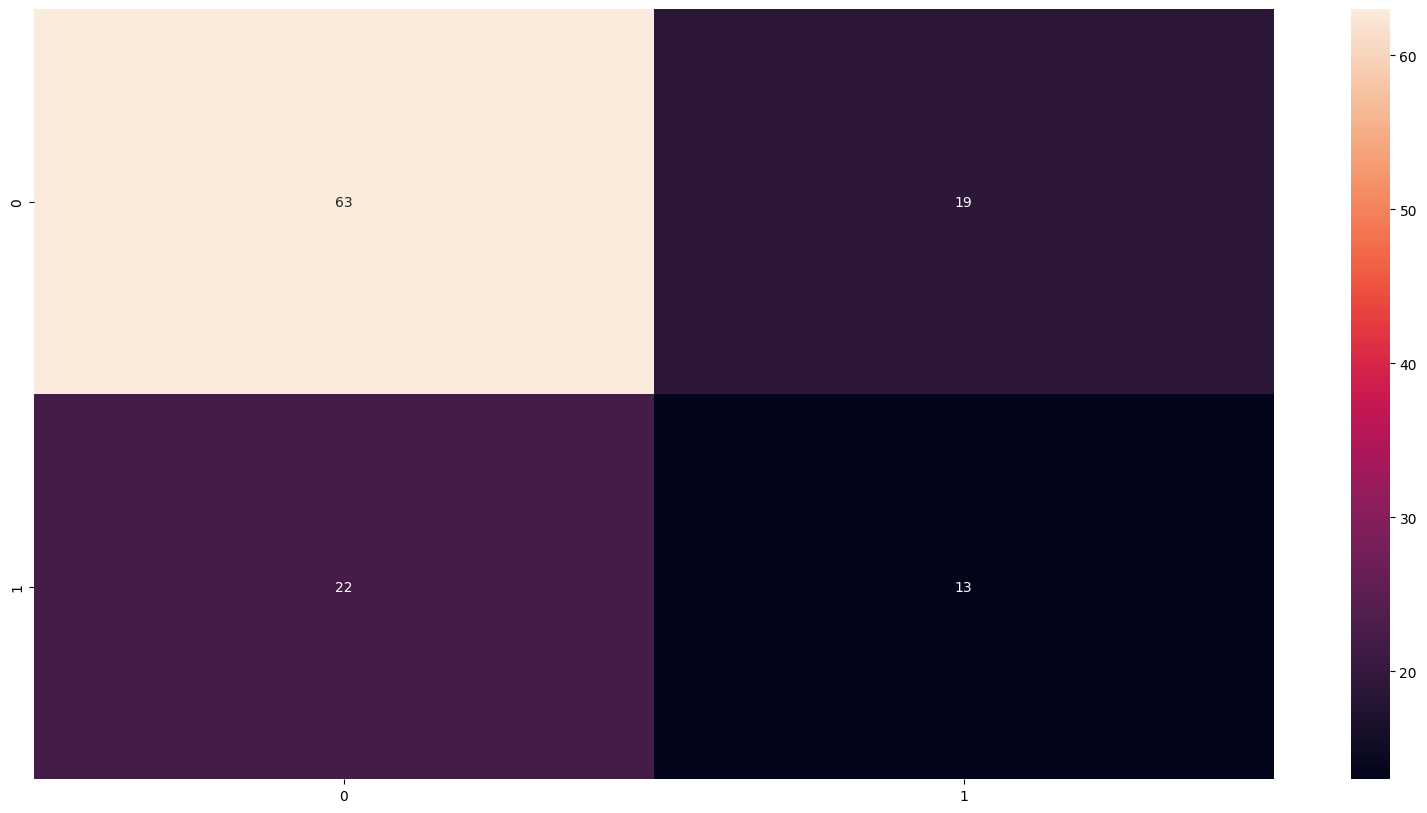

In [175]:
plt.figure(figsize=(20,10))
plt.xlabel('Predicted')
plt.ylabel('Truth')
sns.heatmap(cm,annot=True)